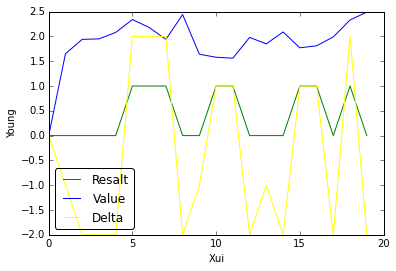

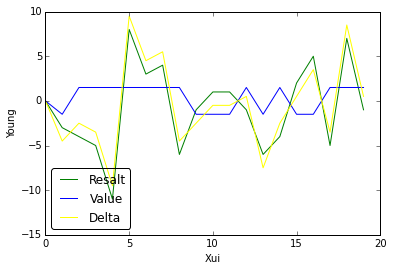

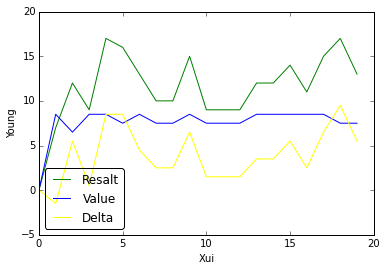

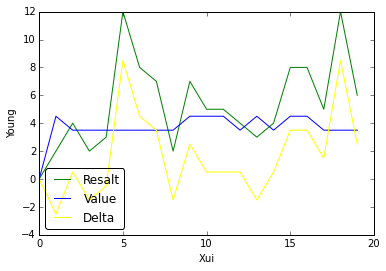

In [119]:
%matplotlib inline
from pymongo import MongoClient
import matplotlib.pyplot as plt

client = MongoClient("mongodb://localhost:27017/")
db = client["delta_test"]

name = "Detroit Tigers"
match_list = db.matches.find({'league': 'mlb', 'season': '2015', 'seas_type': 'season',
                              '$or': [{'home.team': name}, {'away.team': name}]})\
                              .sort([('date.stamp', 1)])

arry = [[[0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0]],
[[0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0]]]

for match in match_list:

    """   get delta   """
    # delta = match["home"]["ftot"] if match["home"]["team"] == name else match["away"]["ftot"]
    numb = 0 if match["home"]["team"] == name else 1
    place = 'home' if numb == 0 else 'away'
    
    """   набивает массивы по одному числу   """
    arry[0][0].append(float(match[place]["ftot"]["resalt"][0]))
    arry[1][0].append(float(match[place]["ftot"]["resalt"][1]))
    arry[2][0].append(float(match[place]["ftot"]["resalt"][2]))
    arry[3][0].append(float(match[place]["ftot"]["resalt"][3]))
    
    arry[0][1].append(match["odds"]["line"]["ftot"]["mean"][numb]) 
    arry[1][1].append(match["odds"]["hand"]["ftot"]["value"][numb]) 
    arry[2][1].append(match["odds"]["totl"]["ftot"]["value"][numb]) 
    arry[3][1].append(match["odds"]["itot"]["ftot"]["value"][numb])

    arry[0][2].append(float(match[place]["ftot"]["delta"][0]))
    arry[1][2].append(match[place]["ftot"]["delta"][1])
    arry[2][2].append(match[place]["ftot"]["delta"][2])
    arry[3][2].append(match[place]["ftot"]["delta"][3])

for r in arry:
    plt.figure()
    plt.xlabel('Xui')
    plt.ylabel('Young')
    X = range(len(r[0]))
    d_X, dY = range(len(r[0])), [0.0] * len(r[0])

    plt.plot(X, r[0], color='green', label = 'Resalt')
    plt.plot(X, r[1], color='blue', label = 'Value')
    # plt.plot(d_X, dY, color='yellow', ls = '--')
    plt.plot(X, r[2], color='yellow', label = 'Delta')

    plt.legend(loc='lower left', fancybox=True)


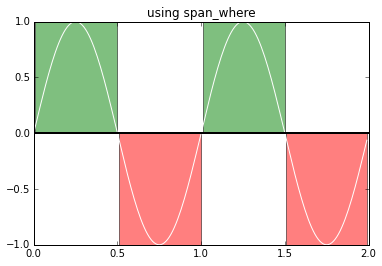

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0.0, 2, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = 1.2*np.sin(4*np.pi*t)


fig, ax = plt.subplots()
ax.set_title('using span_where')
ax.plot(t, s1, color='white')
ax.axhline(0, color='black', lw=2)

collection = collections.BrokenBarHCollection.span_where(
       t, ymin=0, ymax=1, where=s1>0, facecolor='green', alpha=0.5)
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
       t, ymin=-1, ymax=0, where=s1<0, facecolor='red', alpha=0.5)
ax.add_collection(collection)



plt.show()